In [1]:
import warnings;warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
traindata=pd.read_csv('train.csv')
testdata=pd.read_csv('test.csv')
# 读取训练集 测试集数据

In [2]:
traindata.info()
print('-'*40)
testdata.info()
#查看数据结构和缺失情况

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [3]:
traindata.describe()#查看数字型变量（包含整型和浮点型）

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
traindata.describe(include=[np.object])#查看字符串型变量

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Andrews, Mr. Thomas Jr",male,347082,G6,S
freq,1,577,7,4,644


离散特征：Pclass,SibSp,Parch,Sex,Embarked 连续特征：Age,Fare,Ticket 删除特征：Name,Cabin 标签：Survived

# 离散特征分析

In [5]:
traindata[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Pclass数字越大存活率越低

In [6]:
traindata[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by='Survived',ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


女性存活率更高

In [7]:
traindata[['Embarked','Survived']].groupby(['Embarked']).mean().sort_values(by='Survived',ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


C港上船的乘客存活率较高

In [8]:
traindata[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived',ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


兄弟姐妹配偶数和生存率的关系

In [9]:
traindata[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


孩子父母和生存率的关系

# 连续特征分析

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.FacetGrid(traindata,col='Survived')
g.map(plt.hist,'Age',bins=20)
#年龄与存活率的柱状图

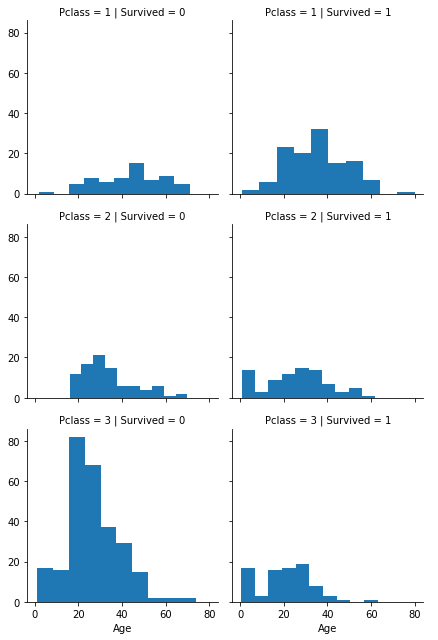

In [11]:
grid=sns.FacetGrid(traindata,col='Survived',row='Pclass')
grid.map(plt.hist,'Age')
grid.add_legend()

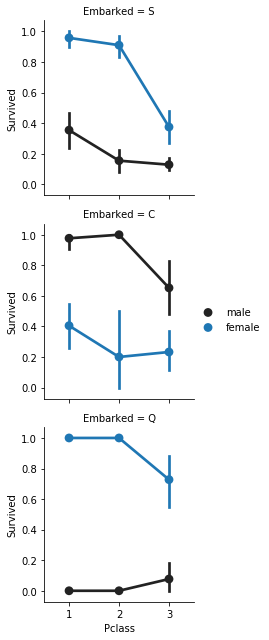

In [12]:
grid=sns.FacetGrid(traindata,row='Embarked')
grid.map(sns.pointplot,'Pclass','Survived','Sex')
grid.add_legend()

In [63]:
# traindata['Title']=traindata.Name.str.extract('([A-Za-z]+)\.',expand=False)
# traindata['Title']
split=traindata['Name'].str.split(',',expand=True)
split1=pd.DataFrame(split.iloc[:,1].str.split('.',expand=True).iloc[:,0])
split1
split1.rename(columns={0:"Title"},inplace=True)
traindata1=pd.concat([traindata,split1],axis=1)
traindata1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [14]:
split2=testdata['Name'].str.split(',',expand=True)
split3=pd.DataFrame(split2.iloc[:,1].str.split('.',expand=True).iloc[:,0])
split3
split3.rename(columns={0:"Title"},inplace=True)
testdata1=pd.concat([testdata,split3],axis=1)
testdata1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Mr
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Miss
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Mr
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,Mrs
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,Mr


In [15]:
pd.crosstab(traindata1['Title'],traindata1['Sex'])
#查看训练集名称简称

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [64]:
traindata1['Title'].replace([' Capt',' Col',' Don',' Dr',' Jonkheer',' Lady',' Major',' Rev',' Sir',' the Countess'],'Rare',inplace=True)
traindata1['Title'].replace(' Mlle','Miss',inplace=True)
traindata1['Title'].replace(' Ms','Miss',inplace=True)
traindata1['Title'].replace(' Mme','Mrs',inplace=True)

traindata1['Title'].replace(' Master','Master',inplace=True)
traindata1['Title'].replace(' Miss','Miss',inplace=True)
traindata1['Title'].replace(' Mr','Mr',inplace=True)
traindata1['Title'].replace(' Mrs','Mrs',inplace=True)

traindata1[['Title','Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [65]:
pd.crosstab(testdata1['Title'],testdata1['Sex'])
#查看训练集名称简称

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [67]:
testdata1['Title'].replace([' Col',' Dona',' Dr',' Rev'],'Rare',inplace=True)
testdata1['Title'].replace(' Ms','Miss',inplace=True)


testdata1['Title'].replace(' Master','Master',inplace=True)
testdata1['Title'].replace(' Miss','Miss',inplace=True)
testdata1['Title'].replace(' Mr','Mr',inplace=True)
testdata1['Title'].replace(' Mrs','Mrs',inplace=True)

testdata1['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

In [ ]:
traininput=traindata.drop(columns=['Survived'])
traininput.head()

In [ ]:
datainput=pd.concat([traininput,testdata],axis=0,ignore_index=True)
datainput.info()

In [ ]:
data.drop(columns=['PassengerId','Name'],inplace=True)

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data['Embarked'].value_counts()